In [155]:
# %pip install yfinance
# %pip install sdv
# %pip install muarch
%pip install pyportfolioopt

     ---------------------------------------- 61.8/61.8 kB 1.0 kB/s eta 0:00:00
     -------                               174.1/833.2 kB 10.4 kB/s eta 0:01:04
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Nick\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\urllib3\response.py", line 435, in _error_catcher
    yield
  File "C:\Users\Nick\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\urllib3\response.py", line 516, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\Nick\AppData\Local\Programs\Python\Python39\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Users\Nick\AppData\Local\Programs\Python\Python39\lib\http\client.py", line 462, in read
    n = self.readinto(b)
  File "C:\Users\Nick\AppData\Local\Programs\Python\Python39\lib\http\client.py", line 506, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\Nick\AppData\Local\Programs\Python\Python39\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\Nick\AppData\Local\Programs\Pyth

In [92]:
import yfinance
import muarch
import pandas as pd
import numpy as np

In [93]:
def get_ticker(ticker, period='5y'):
    yahoo_ticker = yfinance.Ticker(ticker)
    ticker_df = yahoo_ticker.history(period=period)
    ticker_df = ticker_df['Close'].pct_change().dropna()
#     ticker_df['Date'] = ticker_df.index
#     display(ticker_df)
    return ticker_df

tickers = ['VOO', 'EEM', 'IEFA', 'MTUM']
ticker_dfs = [get_ticker(ticker) for ticker in tickers]
ticker_dict = dict(zip(tickers, ticker_dfs))
df = pd.DataFrame(ticker_dict)
# df['Date'] = df.index
df.index = [i for i in range(df.shape[0])]
df

,VOO,EEM,IEFA,MTUM
0,0.001752,-0.001922,-0.000493,0.009112
1,-0.008971,-0.012034,-0.005099,-0.006243
2,0.006337,0.001949,0.001157,0.009760
3,0.001035,0.009482,0.001651,0.004555
4,-0.000764,0.008189,0.002638,-0.000442
...,...,...,...,...
1253,-0.003750,0.001230,-0.003998,0.008023
1254,-0.021609,-0.006143,-0.007025,-0.007236
1255,0.000492,-0.003955,-0.004548,-0.003134
1256,-0.007894,-0.004716,-0.004230,-0.002925


In [94]:
from sdv.tabular import TVAE, CopulaGAN, CTGAN, GaussianCopula
from sdv.timeseries import PAR

sequence_index='Date'
model = GaussianCopula()
model.fit(df)
new_data = model.sample(df.shape[0])
new_data

C:\Users\Nick\AppData\Local\Programs\Python\Python39\lib\site-packages\copulas\univariate\truncated_gaussian.py:45: RuntimeWarning: divide by zero encountered in double_scalars
  a = (self.min - loc) / scale
C:\Users\Nick\AppData\Local\Programs\Python\Python39\lib\site-packages\copulas\univariate\truncated_gaussian.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  b = (self.max - loc) / scale


,VOO,EEM,IEFA,MTUM
0,0.005347,-0.012416,0.007947,-0.011445
1,-0.004508,0.000988,0.000360,-0.006054
2,0.007764,0.008900,0.019545,-0.007253
3,0.025502,0.032580,0.024236,0.029545
4,-0.022298,-0.022187,-0.024743,-0.016119
...,...,...,...,...
1253,-0.019548,-0.019809,-0.000598,-0.037667
1254,-0.015764,-0.009043,-0.004640,-0.015605
1255,-0.015978,-0.041867,-0.013984,-0.023515
1256,0.000683,0.001216,-0.001723,0.004085


In [95]:
save_path = 'PAR_model.pkl'
model.save(save_path)
# PAR = model.load(save_path)

In [96]:
import sys, os

def suppress_printing(func):
    sys.stdout = open(os.devnull, 'w')
    func()
    sys.stdout.close() 
    sys.stdout = sys.__stdout__
    return

def print_redirect(func):
    sys.stdout = open('redirect.txt','w')
    func()
    sys.stdout.close()
    sys.stdout = sys.__stdout__
    return

In [97]:
def call_corr(df_a, df_b, method):
    corr_name = method.title()
    print(f"First DataFrame {corr_name}, Correlation:")
    corr_a = df_a.corr(method=method)
    display(corr_a)
    print(f"Second DataFrame {corr_name} Correlation:")
    corr_b = df_b.corr(method=method)
    display(corr_b)
    print(f"Difference in {corr_name} Correlation:")
    corr_dif_df = corr_a - corr_b
    display(corr_dif_df)
    return

In [98]:
def compare_dfs(df_a, df_b, corr_method='kendall'):
# corr_method = 'kendall'/'tau', 'spearman'/'rho', 'pearson'/'r', 'all'
    if corr_method == 'all':
        call_corr(df_a, df_b, method='pearson')
        call_corr(df_a, df_b, method='kendall')
        call_corr(df_a, df_b, method='spearman')
    elif corr_method in ['kendall','tau']:
        call_corr(df_a, df_b, method='kendall')
    elif corr_method in ['spearman','rho']:
        call_corr(df_a, df_b, method='spearman')
    elif corr_method in ['pearson','r']:
        call_corr(df_a, df_b, method='pearson')

In [102]:
compare_dfs(df, new_data, corr_method='spearman')

First DataFrame Spearman, Correlation:


,VOO,EEM,IEFA,MTUM
VOO,1.000000,0.699247,0.812518,0.866681
EEM,0.699247,1.000000,0.783121,0.637479
IEFA,0.812518,0.783121,1.000000,0.689390
MTUM,0.866681,0.637479,0.689390,1.000000


Second DataFrame Spearman Correlation:


,VOO,EEM,IEFA,MTUM
VOO,1.000000,0.761808,0.848476,0.901167
EEM,0.761808,1.000000,0.828445,0.721013
IEFA,0.848476,0.828445,1.000000,0.735175
MTUM,0.901167,0.721013,0.735175,1.000000


Difference in Spearman Correlation:


,VOO,EEM,IEFA,MTUM
VOO,0.000000,-0.062561,-0.035958,-0.034486
EEM,-0.062561,0.000000,-0.045324,-0.083534
IEFA,-0.035958,-0.045324,0.000000,-0.045784
MTUM,-0.034486,-0.083534,-0.045784,0.000000


In [100]:
from sdv.evaluation import evaluate

evaluate(df, new_data)

C:\Users\Nick\AppData\Local\Programs\Python\Python39\lib\site-packages\sdmetrics\column_pairs\statistical\kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isna(real_data)] = 0.0
C:\Users\Nick\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
C:\Users\Nick\AppData\Local\Programs\Python\Python39\lib\site-packages\sdmetrics\column_pairs\statistical\kl_divergence.py:52: SettingWithCopyWarning: 
A value is trying to be s

0.8897133214826821

In [ ]:
# https://www.quantrocket.com/machine-learning/
# https://www.quantrocket.com/

In [ ]:
def get_ticker(ticker, period='5y'):
    yahoo_ticker = yfinance.Ticker(ticker)
    ticker_df = yahoo_ticker.history(period=period)
    ticker_df = ticker_df['Close'].pct_change().dropna()
#     ticker_df['Date'] = ticker_df.index
#     display(ticker_df)
    return ticker_df

def resample_na(df, add_noise=.01):
    if df.any(np.nan):
        sample_df = df.sample(size=df.shape[0], replace=False,)
        if add_noise:
            sample_arr = np.random.normal(df.shape, 0, add_noise)
            sample_df += sample_arr
    cols = df.columns
    for i, col in enumerate(df):
        temp_df = df.copy().sort_values()
        sample_df = sample_df.copy()
        get_index
    
    return df

def get_ticker_df(tickers, years=6, period='max')
    ticker_dfs = [get_ticker(ticker, period=period) for ticker in tickers]
    ticker_dict = dict(zip(tickers, ticker_dfs))
    df = pd.DataFrame(ticker_dict)
#     df.index = [i for i in range(df.shape[0])]
    display(df)
    

In [ ]:
from pypfopt import black_litterman, risk_models

# delta = black_litterman.market_implied_risk_aversion(market_prices)
# prior = black_litterman.market_implied_prior_returns(mcaps, delta, cov_matrix)

In [ ]:
bl_model = BlackLittermanModel()
bl_returns = bl_model.bl_returns()

In [144]:
import time
import ipywidgets as widgets

all_tickers = ['VOO','IJH','MTUM','ISTB','JNK','UHY']
def construct_portfolio_tickers(all_tickers):
    tickers = widgets.SelectMultiple(
        options=all_tickers,
        value=[],
        rows=10,
        description='Portfolio Tickers',
        disabled=False
    )
    display(tickers)
    return tickers

tickers = construct_portfolio_tickers(all_tickers);


button = widgets.Button(
    description='Submit',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
ret = False
def f(b):
    print("Submitted")
    global ret
    ret = True
    return
button.on_click(f)
display(button)

SelectMultiple(description='Portfolio Tickers', options=('VOO', 'IJH', 'MTUM', 'ISTB', 'JNK', 'UHY'), rows=10,…

Button(description='Submit', icon='check', style=ButtonStyle(), tooltip='Click me')

Submitted


In [145]:
if ret:
    result = tickers.value
    ret = False
else:
    print('New List not Submitted')

[*********************100%***********************]  3 of 3 completed


,IJH,JNK,VOO
Date,,,
2022-07-01,229.050003,91.040001,350.440002
2022-06-30,226.229996,90.257004,346.880005
2022-06-29,228.350006,90.366455,349.640015
2022-06-28,230.149994,90.525658,349.467987
2022-06-27,233.580002,91.749512,357.186371
...,...,...,...
2010-09-15,65.676796,57.569050,82.324799
2010-09-14,65.433235,57.539894,82.117615
2010-09-13,65.357689,57.525326,82.133537


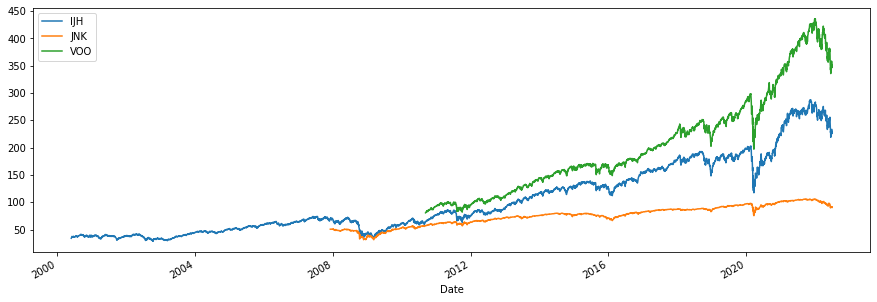

In [149]:
df = yfinance.download(result, period="max")
prices = df['Adj Close'].iloc[::-1]
prices.plot(figsize=(15,5))
prices = prices.dropna()
prices

In [152]:
print(yfinance.Ticker('AMZN').info['marketCap'])

1114707329024


In [153]:
weight_vr = [1 for i in range(len(result))] # even weights
weight_vr = np.divide(weight_vr, np.sum(weight_vr))
print(weight_vr)
weight_dict = dict(zip(result, weight_vr))
display(weight_dict)

[0.33333333 0.33333333 0.33333333]


{'VOO': 0.3333333333333333,
 'IJH': 0.3333333333333333,
 'JNK': 0.3333333333333333}

### Covariance Matrix Estimation
[Docs](https://pyportfolioopt.readthedocs.io/en/latest/RiskModels.html) <br>
Estimating the forward covariance is central to diversifying portfolios, many methods exist for better forward estimation as raw past covariance matrix estimations are generally considered very poor for optimization, here are some alternatives directly from PyPortfolioOpt

In [154]:
from pypfopt import risk_models as RiskModel
# All RiskModel methods can take returns_data=True if not raw pricing
# Benchmarks can be set manually, defaults to RFR
# Time Periods defaults to yearly (252 days)

methods = (
# Default Approach: same as df.corr()
    'sample_cov'
# SemiCovariance: Covariance When Sample is below Benchmark
    'semicovariance'
# Exponential Moving Average Covariance Matrix
    'exp_cov'
# Estimate via a shrinkage constant, by below approaches
    'ledoit_wolf'
    'ledoit_wolf_constant_variance'
    'ledoit_wolf_single_factor'
    'ledoit_wolf_constant_correlation'
    'oracle_approximating'
)
# 
cov_matrix = RiskModel.risk_matrix(prices, method=methods[3])
plotting.plot_covariance(cov_matrix, plot_correlation=True);

ModuleNotFoundError: No module named 'pypfopt'

In [ ]:
benchmark = yf.download('SPY', period='max')['Adj Close'] # this is pretty imprecise, improve later
delta = black_litterman.market_implied_risk_aversion(benchmark)

In [ ]:
def normalize_matrix(matrix):
    norm_matrix = np.linalg.norm(matrix)
    matrix = np.divide(matrix, norm_matrix)
    return matrix

def normalize_array(arr):
    tot_weight = np.sum(arr)
    matrix = np.divide(matrix, tot_weight)
    return matrix

def horizontal_weight_graph(names, weights):
    # https://seaborn.pydata.org/examples/part_whole_bars.html
    weights = normalize_array(weights)
    f, ax = plt.subplots(figsize=(6, 15))
    sns.set_color_codes("pastel")
    sns.barplot(x=weights, y=names, color="b")
#     ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(xlim=(0, 1), ylabel="", xlabel="Weight")
    sns.despine(left=True, bottom=True)
    plt.show()
    return

def vertical_uncertainty_graph(names, uncertainties):
    f, ax = plt.subplots(figsize=(15, 6))
    sns.set_color_codes("pastel")
    sns.barplot(x=names, y=uncertainties, color="b")
#     ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(xlim=(0, 1), ylabel="", xlabel="Weight")
    sns.despine(left=True, bottom=True)
    plt.show()
    return

In [ ]:
from pypfopt import BlackLittermanModel
#Absolute Views
#############
random_view = np.random.normal(0, .1, size=len(result))
############
view = random_view #input your own views on chosen assets here
view_dict = dict(zip(result, view))

abs_bl = BlackLittermanModel(cov_matrix, absolute_views=view_dict, pi=None)

In [ ]:
def uncertainty_from_min_max(mins, maxes, devs=3):
    uncertainties = list()
    for pmin, pmax in zip(mins, maxes):
        sigma = (pmax - pmin) / (devs * 2)
        variance = sigma**2
        uncertainties.append(variance)
    return uncertainties

In [ ]:
#Absolute Views with Confidence
########
random_conf = np.random.uniform(0, 1, size=len(result))
########
conf = random_conf #input your own confidences on views here

abs_conf_bl = BlackLittermanModel(
    cov_matrix, 
    absolute_views=view_dict, 
    omega='idzorek', 
    view_confidences=conf, 
    pi=None
)

uncertainties = np.diag(bl.omega)
vertical_uncertainty_graph(result, uncertainties)

In [ ]:
from pypfopt import plotting

bl_cov_matrix = abs_bl.bl_cov()
bl_returns = abs_bl.bl_returns()
plotting.plot_covariance(S_bl);

In [ ]:
all_tickers = ['VOO','IJH','MTUM','ISTB','JNK','UHY']
def construct_portfolio_tickers(all_tickers):
    tickers = widgets.SelectMultiple(
        options=all_tickers,
        value=[],
        rows=10,
        description='Portfolio Tickers',
        disabled=False
    )
    display(tickers)
    return tickers

tickers = construct_portfolio_tickers(all_tickers);

button = widgets.Button(
    description='Submit',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)
ret = False
def f(b):
    results.append()
    return
button.on_click(f)
display(button)

## CVaR Optimization
PyPortfolioOpt does not universally support CVaR optimization, here are some other methods that may allow CVaR based optimizers <br>
[PyPortfolioOpt CVaR Efficient Frontier](https://pyportfolioopt.readthedocs.io/en/stable/_modules/pypfopt/efficient_frontier/efficient_cvar.html) <br>
[Github CVaR Optimization Topics](https://github.com/topics/cvar-optimization) <br>
[Riskfolio Examples](https://github.com/dcajasn/Riskfolio-Lib/tree/master/examples) <br>
[Riskfolio Examples](https://riskfolio-lib.readthedocs.io/en/latest/examples.html) <br>
[Example CVaR](https://github.com/jaydu1/CVaR-Portfolio) <br>
[Riskfolio BL Mean Risk Opt](https://github.com/microprediction/Riskfolio-Lib/blob/master/examples/Tutorial%203.ipynb) <br>
[Riskfolio Bond Opt](https://github.com/microprediction/Riskfolio-Lib/blob/master/examples/Tutorial%204.ipynb) <br>

## Copula GARCH with MUArch
[PyPi](https://pypi.org/project/muarch/) <br>
[MCS Example](https://muarch.readthedocs.io/en/latest/examples/Copula-GARCH.html) <br>

In [ ]:
% conda install -c danielbok muarch
% conda install -c conda-forge copulae
from muarch import MUArch, UArch
from copulae import TCopula
df

In [ ]:
ret_df = pd.DataFrame()
for col in df:
    ret_df[col] = df[col].pct_change()
ret_df.index = df.index
ret_df = ret_df.dropna()
ret_df

In [ ]:
num_assets = ret_df.shape[1]
models = MUArch(num_assets, mean='AR', lags=1, dist='skewt')
# models[0] = UArch('AR', lags=1, dist='skewt')
models.fit(ret_df)
models.summary()

In [ ]:
residuals = models.residuals() # other options for residuals than standardized

copula = TCopula(dim=num_assets)
copula.fit(residuals)
cop.summary()

In [ ]:
copula[:] = corr_matrix
cop.summary()

In [ ]:
forecast_time = 60
num_trials = 10 # 00
result_arr = models.simulate_mc(forecast_time, num_trials, custom_dist=copula.random)
result_arr.shape

In [ ]:
for i, trial in enumerate(result_arr):
    if i == 0:
        print(trial.shape)
    for j, val in enumerate(trial):
        plt.plot(trial[:,j])
plt.show()